# **Regional Sales Analysis**: An **EDA** Case Study

## **Workflow**

1. Data Acquisition & Loading

2. Domain Knowledge & Business Context

3. Data Understanding

4. Data Cleaning & Preparation

5. Exploratory Data Analysis (EDA) The core investigative process.\
    5.1 Statistical Analysis\
    5.2 Visualization & Exploration

6. Insights & Reporting

----------------

## **1. Data Acquisition & Loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Specify the path to your Excel file
file_path = '/content/Regional Sales Dataset.xlsx'

# 2. Read the sheets into DataFrames
sales_df = pd.read_excel(file_path, sheet_name='Sales Orders')
cust_df = pd.read_excel(file_path, sheet_name='Customers')
reg_df = pd.read_excel(file_path, sheet_name='Regions')
st_df = pd.read_excel(file_path, sheet_name='State Regions')
prod_df = pd.read_excel(file_path, sheet_name='Products')
bud_df = pd.read_excel(file_path, sheet_name='2017 Budgets')

# 3. Display the DataFrames (optional)
print(sales_df.head())
print(cust_df.head())
print(reg_df.head())
print(st_df.head())
print(prod_df.head())
print(bud_df.head())

    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6        

---------

## **2. Domain Knowledge & Business Context**

### **2.1 Problem Statement**

Sales teams often lack a clear, data-driven understanding of regional performance, making it difficult to identify growth opportunities and optimize resources. This project aims to analyze and visualize regional sales data to uncover trends, evaluate profitability, and support strategic decision-making.

2.1 Problem Statement\
2.2 Project Goal\
2.3 Connecting the Data: A Business View\
2.4 Key Metrics & Critical Variables

#### **2.1.1 Business Questions**

*	Inconsistent revenue and profit performance across U.S. regions

*	Lack of visibility into seasonal swings, top SKUs, and channel profitability

### **2.2 Project Goal**

To explore and analyze the regional 5-year dataset in order to identify trends and improve decision-making for sales optimization.


**Project Objectives:**

* **Analyze Regional Performance:** Compare ***revenue*** and ***profits*** across U.S. regions to identify strengths and weaknesses.

* **Examine Seasonal Trends:** Investigate ***seasonal variations in sales*** to understand their impact.

* **Identify Top Products:** Determine which ***SKUs*** are driving sales in different regions.

* **Evaluate Sales Channels:** Assess the ***profitability*** of various ***sales channels*** to inform resource allocation.

* **Create Actionable Recommendation:** Use the findings to uncover insights and suggest growth opportunities.




### **2.3 Connecting the Data**

**ER DIAGRAM**

Entity Relationships

- **STATE_REGIONS (1)** ────── (M) **REGIONS (1)** ────── (M) **SALES_ORDER**
  - **PK:** State_Code
  - **PK:** id
  - **PK:** OrderNumber
  - **FK:** state_code

- **CUSTOMERS (1)** ─────────── (M) **SALES_ORDER**
  - **PK:** Customer_Index
  - **FK:** Customer_Name_Index

- **PRODUCTS (1)** ───────────── (M) **SALES_ORDER (1)** ────── (1) **2017_BUDGETS**
  - **PK:** Index
  - **FK:** Product_Desc_Index
  - **FK:** Product_Name
  - **PK:** Product_Name

**RELATIONSHIP KEY:**
- **(1) ──── (M)** = One-to-Many
- **(1) ──── (1)** = One-to-One

**PK** = Primary Key, **FK** = Foreign Key

### **2.4 Key Metrics & Critical Variables**

These **metrics** are calculated based on the relation establish in the ER Diagram by combining and aggregating the variables from the different sheets (Regional Sales Dataset)  to answer the business questions.

| Key Metric                     | Critical Variables                                               | Analytical Objective              |
|-------------------------------|------------------------------------------------------------------|-----------------------------------|
| Regional Revenue Growth Rate  | Line Total, Delivery Region Index                                | Analyze Regional Performance      |
| Seasonal Sales Variance       | OrderDate, Line Total, Delivery Region Index                     | Examine Seasonal Trends           |
| Top SKUs Revenue Contribution | Product Description Index, Line Total, Delivery Region Index     | Identify Top Products             |
| Channel Profitability Ratio   | Channel, Line Total, Total Unit Cost, Delivery Region Index      | Evaluate Sales Channels           |


--------

## **3. Data Understanding**

This section is for a **first look at the raw data**. The goal is not to analyze or clean yet, but to get acquainted with the **dataset's structure, size, and very basic characteristics**. It answers fundamental questions about the data's form before you dive into its content.


3.1 Basic Data Structure

3.2 Initial data Quality Snapshots

3.3 Preliminary Statistical Glimpse (for numerical columns only)

3.4 Deep Dive into Specific Columns:

3.4.1 Check unique values for a categorical column

3.4.2 Check distribution for a key numerical column

### **3.1 Basic Structure**

**- Shape/Dimensions:** (Number of rows, Number of columns)

**-	Column Names and Data Types:** List all column names and their types (e.g., object, int64, float64, datetime64).

**-	Sample Data**: Display the first 5 rows and last 5 rows.


In [ ]:
# 3.1 Basic Data Structure Analysis
print("=" * 50)              # Print a 50-character wide separator line
print("3.1 BASIC DATA STRUCTURE")  # Display the section title for documentation
print("=" * 50)              # Close the section header with matching separator

# Sales Orders Dataset
print("\n" + "="*40)            # Print separator line for visual organization
print("SALES ORDERS DATASET")   # Display dataset name as section header
print("="*40)                   # Close the header with another separator
print("Info:")                  # Label for the info section
sales_df.info()                 # Show dataset structure: columns, data types, non-null counts
print("\nFirst 5 rows:")        # Label for the data preview
display(sales_df.head(5))       # Display first 5 rows to see data format and values
print("\nLast 5 rows:")         # Label for the end of dataset preview
display(sales_df.tail(5))       # Display last 5 rows to check data consistency throughout


# Customers Dataset
print("\n" + "="*40)
print("CUSTOMERS DATASET")
print("="*40)
print("Info:")
cust_df.info()
print("\nFirst 5 rows:")
display(cust_df.head(5))
print("\nLast 5 rows:")
display(cust_df.tail(5))

# Regions Dataset
print("\n" + "="*40)
print("REGIONS DATASET")
print("="*40)
print("Info:")
Reg_df.info()
print("\nFirst 5 rows:")
display(Reg_df.head(5))
print("\nLast 5 rows:")
display(Reg_df.tail(5))

# State Regions Dataset
print("\n" + "="*40)
print("STATE REGIONS DATASET")
print("="*40)
print("Info:")
st_df.info()
print("\nFirst 5 rows:")
display(st_df.head(5))
print("\nLast 5 rows:")
display(st_df.tail(5))

# Products Dataset
print("\n" + "="*40)
print("PRODUCTS DATASET")
print("="*40)
print("Info:")
prod_df.info()
print("\nFirst 5 rows:")
display(prod_df.head(5))
print("\nLast 5 rows:")
display(prod_df.tail(5))

# Budgets Dataset
print("\n" + "="*40)
print("BUDGETS DATASET")
print("="*40)
print("Info:")
bud_df.info()
print("\nFirst 5 rows:")
display(bud_df.head(5))
print("\nLast 5 rows:")
display(bud_df.tail(5))

### **3.2 Initial Data Quality Snapshot**

**3.2.1 Missing Values Summary:** A quick table showing the number and percentage of missing (NA, NaN, None) values for each column.

**3.2.2 Duplicate Rows:** Count the number of completely duplicate rows.


In [ ]:
# 3.2 Initial Data Quality Snapshot
print("=" * 50)  # Print a line of 50 equal signs for visual separation
print("3.2 INITIAL DATA QUALITY SNAPSHOT")  # Print the section title or header
print("=" * 50)  # Print another line of 50 equal signs for visual separation

# Sales Orders Dataset
print("\n" + "=" * 40)                # Print a newline followed by 40 equal signs for visual separation
print("SALES ORDERS DATASET")         # Print the title of the dataset
print("=" * 40)                       # Print another line of 40 equal signs for visual separation
print("Missing Values:\n", sales_df.isnull().sum())  # Print the count of missing values in each column
print("\nPercentage Missing:\n", sales_df.isnull().sum() / len(sales_df) * 100)  # Print the percentage of missing values for each column
print("\nDuplicate Rows:", sales_df.duplicated().sum())  # Print the total number of duplicate rows in the dataset

# Customers Dataset
print("\n" + "="*40)
print("CUSTOMERS DATASET")
print("="*40)
print("Missing Values:\n", cust_df.isnull().sum())
print("\nPercentage Missing:\n", cust_df.isnull().sum() / len(cust_df) * 100)
print("\nDuplicate Rows:", cust_df.duplicated().sum())

# Regions Dataset
print("\n" + "="*40)
print("REGIONS DATASET")
print("="*40)
print("Missing Values:\n", reg_df.isnull().sum())
print("\nPercentage Missing:\n", reg_df.isnull().sum() / len(reg_df) * 100)
print("\nDuplicate Rows:", reg_df.duplicated().sum())

# State Regions Dataset
print("\n" + "="*40)
print("STATE REGIONS DATASET")
print("="*40)
print("Missing Values:\n", st_df.isnull().sum())
print("\nPercentage Missing:\n", st_df.isnull().sum() / len(st_df) * 100)
print("\nDuplicate Rows:", st_df.duplicated().sum())

# Products Dataset
print("\n" + "="*40)
print("PRODUCTS DATASET")
print("="*40)
print("Missing Values:\n", prod_df.isnull().sum())
print("\nPercentage Missing:\n", prod_df.isnull().sum() / len(prod_df) * 100)
print("\nDuplicate Rows:", prod_df.duplicated().sum())

# Budgets Dataset
print("\n" + "="*40)
print("BUDGETS DATASET")
print("="*40)
print("Missing Values:\n", bud_df.isnull().sum())
print("\nPercentage Missing:\n", bud_df.isnull().sum() / len(bud_df) * 100)
print("\nDuplicate Rows:", bud_df.duplicated().sum())

### **3.3 Preliminary Statistical Glimpse**


In [ ]:
# 3.3 Preliminary Statistical Glimpse
print("=" * 50)
print("3.3 PRELIMINARY STATISTICAL GLIMPSE")
print("=" * 50)

# Sales Orders Dataset
print("\n" + "="*40)
print("SALES ORDERS DATASET")
print("="*40)
print("Numerical Columns Summary:")
display(sales_df.describe(include='number'))
print("\nCategorical Columns Summary:")
display(sales_df.describe(include='object'))

# Customers Dataset
print("\n" + "="*40)
print("CUSTOMERS DATASET")
print("="*40)
print("Numerical Columns Summary:")
display(cust_df.describe(include='number'))
print("\nCategorical Columns Summary:")
display(cust_df.describe(include='object'))

# Regions Dataset
print("\n" + "="*40)
print("REGIONS DATASET")
print("="*40)
print("Numerical Columns Summary:")
display(reg_df.describe(include='number'))
print("\nCategorical Columns Summary:")
display(reg_df.describe(include='object'))

# State Regions Dataset
print("\n" + "="*40)
print("STATE REGIONS DATASET")
print("="*40)
# The State Regions dataset only contains categorical columns, so we only display the categorical summary.
print("Categorical Columns Summary:")
display(st_df.describe(include='object'))

# Products Dataset
print("\n" + "="*40)
print("PRODUCTS DATASET")
print("="*40)
print("Numerical Columns Summary:")
display(prod_df.describe(include='number'))
print("\nCategorical Columns Summary:")
display(prod_df.describe(include='object'))

# Budgets Dataset
print("\n" + "="*40)
print("BUDGETS DATASET")
print("="*40)
print("Numerical Columns Summary:")
display(bud_df.describe(include='number'))
print("\nCategorical Columns Summary:")
display(bud_df.describe(include='object'))

### **3.4 Deep Dive into Specific Columns**



In [ ]:
# 3.4 Deep Dive into Specific Columns
print("=" * 50)
print("3.4 DEEP DIVE INTO SPECIFIC COLUMNS")
print("=" * 50)

# Sales Orders Dataset - Deep Dive
print("\n" + "="*40)
print("SALES ORDERS DATASET - DEEP DIVE")
print("="*40)

# 3.4.1 Check unique values for categorical columns
print("Unique Values in Categorical Columns:")
print("Channel:", sales_df['Channel'].unique())
print("Currency Code:", sales_df['Currency Code'].unique())
print("Warehouse Code:", sales_df['Warehouse Code'].unique())

# 3.4.2 Check distribution for key numerical columns
print("\nDistribution of Key Numerical Columns:")
sales_df['Order Quantity'].hist()
plt.title('Order Quantity Distribution')
plt.show()

sales_df['Unit Price'].hist()
plt.title('Unit Price Distribution')
plt.show()

sales_df['Line Total'].hist()
plt.title('Line Total Distribution')
plt.show()

# Customers Dataset - Deep Dive
print("\n" + "="*40)
print("CUSTOMERS DATASET - DEEP DIVE")
print("="*40)
print("Customer Names Sample:", cust_df['Customer Names'].unique()[:10])

# Regions Dataset - Deep Dive
print("\n" + "="*40)
print("REGIONS DATASET - DEEP DIVE")
print("="*40)
print("State Codes:", reg_df['state_code'].unique())
print("Region Types:", reg_df['type'].unique())

reg_df['population'].hist()
plt.title('Population Distribution')
plt.show()

# Products Dataset - Deep Dive
print("\n" + "="*40)
print("PRODUCTS DATASET - DEEP DIVE")
print("="*40)
print("Product Names Sample:", prod_df['Product Name'].unique()[:10])

# Budgets Dataset - Deep Dive
print("\n" + "="*40)
print("BUDGETS DATASET - DEEP DIVE")
print("="*40)
bud_df['2017 Budgets'].hist()
plt.title('2017 Budgets Distribution')
plt.show()

--------------------

##**4. Data Cleaning & Preparation**

To clean and transform the data based on the findings from Data undrstanding. This section's input is the raw data, and its output is a clean, analysis-ready dataset.

**Data Cleaning** is the first and most vital step in that process. You must clean the data before you can do the other preparation tasks.

**Data Preparation** is the entire process of getting data ready for analysis. It's the overarching goal.

###**4.1 Data Cleaning**

This is about correcting problems in the raw data. It's reactive—you find an issue and you fix it.


#### **4.1.1 Handling Missing Values (NaN, NULL)**

No Missing data founded (**3.2 Initial Data Quality Snapshot**)

#### **4.1.2 Handling Duplicate Records**

No Duplicate Records founded (**3.2 Initial Data Quality Snapshot**)

###**4.2 Data Preparation**

This is a broader term that includes cleaning but also involves structuring and transforming the clean data for a specific purpose (like machine learning). It's proactive—you shape the data to be more useful.

**4.2.1 Removing The first row of st_df** for the 2nd row (the real column names)

In [ ]:
# Promote the first row to column headers
st_df.columns = st_df.iloc[0]

# Remove the first row from the data
st_df = st_df[1:].reset_index(drop=True)

print(st_df.head())

--------------------

## **5. Exploratory Data Analysis (EDA)**

This section constitutes the core investigative phase of the project. Through statistical analysis and visualization, we will explore the underlying structure of the data, test our initial hypotheses, and uncover patterns related to regional performance, seasonality, top products, and channel effectiveness. The findings here will directly inform the insights and recommendations in subsequent sections.

### **5.1 Regional Revenue Growth Rate**




In [ ]:
# 1. To assign a state_code to each Delivery Region Index in the sales_df based on the mapping provided in reg_df

# Merge sales_df with reg_df on Delivery Region Index and id
merged_df = sales_df.merge(reg_df[['id', 'state_code']], left_on='Delivery Region Index', right_on='id', how='left')

# Now merged_df contains sales_df data along with the corresponding state_code
# You can drop the 'id' column if it's no longer needed
merged_df.drop(columns=['id'], inplace=True)

# 2. To assign a Region to each state_code in the sales_df based on the mapping provided in st_df

# Merge sales_df with st_df on state_code and State Code
merged_df = merged_df.merge(st_df[['State Code', 'Region']], left_on='state_code', right_on='State Code', how='left')

# Now merged_df contains sales_df data along with the corresponding state_code
# You can drop the 'id' column if it's no longer needed
merged_df.drop(columns=['State Code'], inplace=True)


# Display the first few rows of the merged DataFrame
display(merged_df.head())
display(merged_df.tail())

In [ ]:
# 3. Data Grouping
merged_df['Year'] = pd.to_datetime(merged_df['OrderDate']).dt.year
grouped_data = merged_df.groupby(['Region', 'Year'])['Line Total'].sum().reset_index()
grouped_data.rename(columns={'Line Total': 'Total Revenue'}, inplace=True)

# 4. Calculate Revenue
print(grouped_data)

In [ ]:
# 5. Percentage Change Calculation:
# Calculate the year-over-year percentage change in 'Line Total' for each delivery region
# This shows how revenue is growing or shrinking annually per region
grouped_data['Revenue Growth Rate'] = grouped_data.groupby('Region')['Total Revenue'].pct_change() * 100
print(grouped_data)

In [ ]:
# 6. Bar Chart

# Set a clean style and color palette
sns.set(style='whitegrid')
sns.set_palette('Set2')  # Try 'Set2', 'Paired', or 'tab10' for better hue separation

# Increase figure size for readability
plt.figure(figsize=(16, 8))

# Create the bar plot
sns.barplot(
    data=grouped_data,
    x='Region',
    y='Total Revenue',
    hue='Year'
)

# Add titles and axis labels
plt.title('Total Revenue by Region and Year', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Improve legend appearance
plt.legend(title='Year', title_fontsize=12, fontsize=10, loc='upper right')

# Tight layout for clean spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# 6. Line Chart

plt.figure(figsize=(12, 6))
for region in grouped_data['Region'].unique():
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total Revenue'], marker='o', label=region)

plt.title('Revenue Trends Over Time by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.legend(title='Region')
plt.grid()
plt.show()

In [ ]:
# Pie Chart

import matplotlib.pyplot as plt

# Aggregate total revenue by region
region_totals = grouped_data.groupby('Region')['Total Revenue'].sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    region_totals,
    labels=region_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors  # Optional: use a nice color palette
)

# Add title
plt.title('Total Revenue Distribution by Region')

# Equal aspect ratio ensures the pie is a circle
plt.axis('equal')

# Show chart
plt.show()


**Insights:** Regional Revenue Growth Rate

**1. Sharp Declines in 2018 Across All Regions:** in 2018, all U.S. regions saw revenue declines between 80% and 85%, marking a sharp downturn. This widespread drop suggests systemic factors like market shifts or policy changes, not isolated regional issues.

**2. Midwest Shows the Steepest Decline:** falling over 84% from ~\$76M in 2017 to ~$12M in 2018

**3. West Region Had Strongest Performance Before 2018:** The West consistently led in revenue from 2014 to 2017, peaking near $90M: Even with the 2018 decline, it holds the highest cumulative revenue, reflecting sustained regional strength.

**4. Northeast and South Show Moderate Growth Before 2018:** Both regions showed modest growth through 2016 before collapsing in 2018: The Northeast dipped in 2017 and plunged to ~$8.5M the following year.

**5. Revenue Growth Was Stable Until 2017:** Most regions showed stable or rising revenue from 2014 to 2017: This indicates consistent business performance prior to the sharp decline in 2018.

**6. Regions with the Highest and Lowest Growth Rates:**
* **Highest Growth Rate (2014-2017):** The **West region** maintained the strongest performance, with consistently high revenue and modest year-over-year increases until 2017.
* **Lowest Growth Rate (2014-2018):** The **Midwest region** experienced the steepest decline, dropping over 84% in 2018 compared to 2017 — the most severe contraction among all regions.

**7. Highest sales and lowest sales:**
* **Highest Sales:** The **West region** had the highest cumulative revenue, totaling approximately **$372 million**, making it the top-performing region overall.
* **Lowest Sales:** The **Northeast region** recorded the lowest cumulative revenue, with around **\$210 million**, indicating the weakest sales performance among the four regions.
* **Difference Highest & Lowest:** **\$162 million**


### **5.2 Seasonal Sales Variance**


In [ ]:
# 1. Extract Month or Quarter from OrderDate
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])
sales_df['Month'] = sales_df['OrderDate'].dt.month
sales_df['Quarter'] = sales_df['OrderDate'].dt.to_period('Q')

# 2. Group by Time Period
monthly_sales = sales_df.groupby('Month')['Line Total'].sum()
quarterly_sales = sales_df.groupby('Quarter')['Line Total'].sum()

# 3. Calculate Statistical Metrics
monthly_mean = monthly_sales.mean()
monthly_std = monthly_sales.std()

# 4. Calculate the Coefficient of Variation
monthly_cv = monthly_std / monthly_mean

print(monthly_sales)
print(quarterly_sales)
print("Mean= ",monthly_mean)
print("std= ",monthly_std)
print("cv= ",monthly_cv)

Month
1     124111403.0
2     114747751.0
3     100613652.1
4      95224755.0
5     102272116.5
6      96912692.7
7      97185201.8
8     101947025.8
9      99432301.4
10    100988872.2
11    101285199.8
12    101247927.7
Name: Line Total, dtype: float64
Quarter
2014Q1    72612027.2
2014Q2    74334342.6
2014Q3    74359715.5
2014Q4    76214644.0
2015Q1    72914291.0
2015Q2    73268513.3
2015Q3    75626424.2
2015Q4    76601481.9
2016Q1    74434588.0
2016Q2    73248661.2
2016Q3    74448658.0
2016Q4    75951762.8
2017Q1    71381947.4
2017Q2    73558047.1
2017Q3    74129731.3
2017Q4    74754111.0
2018Q1    48129952.5
Freq: Q-DEC, Name: Line Total, dtype: float64
Mean=  102997408.25
std=  8230426.717181078
cv=  0.07990906622818908


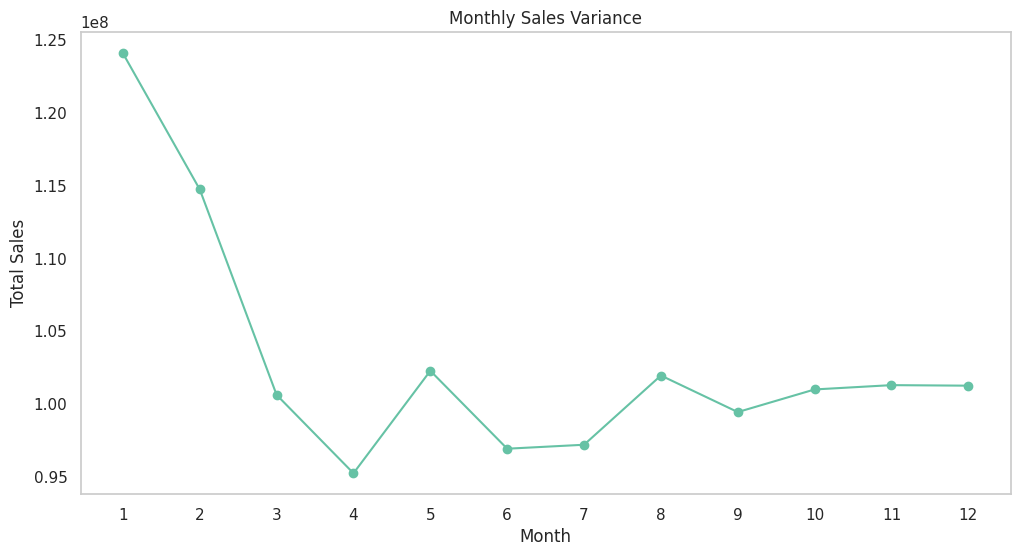

In [ ]:
# 5. Line Chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Variance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # For monthly data
plt.grid()
plt.show()


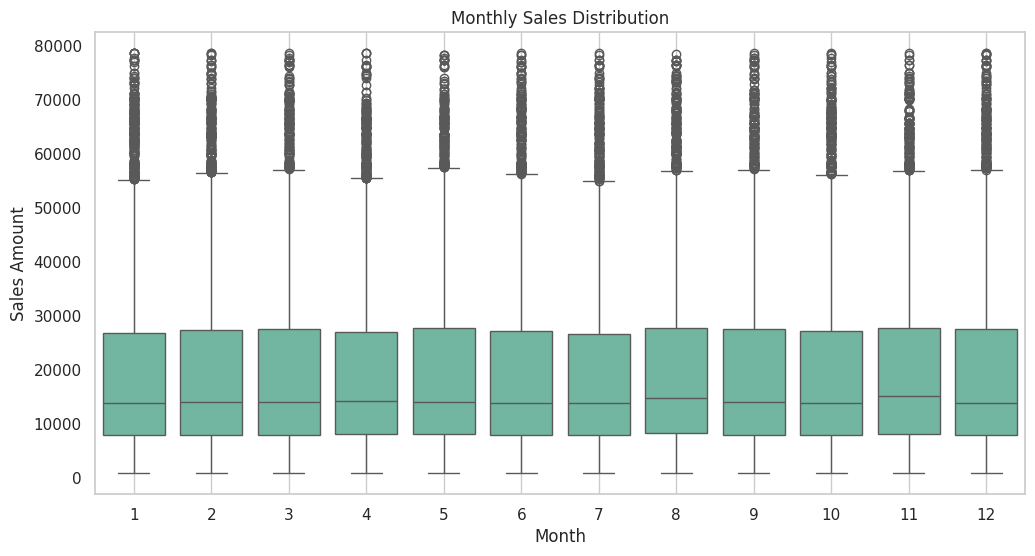

In [ ]:
# 6. Box Plot
plt.figure(figsize=(12, 6))
sales_df['Month'] = sales_df['OrderDate'].dt.month
sns.boxplot(x='Month', y='Line Total', data=sales_df)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()


**Insights:** Seasonal Sales Variance

**1. Monthly Sales Insights:**
* **January recorded the highest monthly sales at $124.1 million**, followed by February at \$114.7 million, both significantly exceeding the average of approximately \$103 million. This indicates a robust post-holiday or first-quarter surge, likely fueled by seasonal demand or promotional cycles.
* **April and June recorded below-average sales**, suggesting seasonal slowdowns or dips in consumer engagement during these months.

**2. Quarterly Sales Insights:**
* From 2014 to 2017, Q4 consistently led in sales, peaking at ~\$76.6M in 2015: This trend highlights strong seasonal buying behavior, likely driven by year-end holiday demand.
* Q1 2018 saw a sharp drop to \$48.1M, well below prior Q1 averages of ~\$73M-$\74M: This decline may signal a broader business slowdown or changing seasonal patterns.

**3. Variability & Stability**
* With a **coefficient of variation (CV) of ~8%**, monthly sales exhibit **low volatility**, indicating stable seasonal patterns that support reliable forecasting and inventory planning.

### **5.3 Top SKUs Revenue Contribution**




In [ ]:
# 1. Group by Product Description Index and sum Line Total
grouped_data = sales_df.groupby('Product Description Index')['Line Total'].sum().reset_index()
print(grouped_data)

# 2. Sort by individual product revenue in descending order
sorted_data = grouped_data.sort_values(by='Line Total', ascending=False)
# print(sorted_data)

# 3. Calculate Percentage Contribution (top 10 products)
top_n = 10
top_products = sorted_data.head(top_n).copy()  # Make a copy to avoid SettingWithCopyWarning
total_revenue = grouped_data['Line Total'].sum()
top_products['Percentage Contribution'] = (top_products['Line Total'] / total_revenue) * 100
print(top_products)


    Product Description Index   Line Total
0                           1   55952289.6
1                           2   57401097.6
2                           3   51764816.4
3                           4   56701537.2
4                           5   70804380.6
5                           6   40149147.0
6                           7   17058267.0
7                           8   19850679.6
8                           9   14598630.0
9                          10   17660583.6
10                         11   22324426.8
11                         12   24173184.6
12                         13   78281379.6
13                         14   75390396.6
14                         15   67331623.2
15                         16   37446541.2
16                         17   40594442.4
17                         18   46228954.8
18                         19   34446174.0
19                         20   39645159.6
20                         21   19246875.6
21                         22   15638202.0
22         

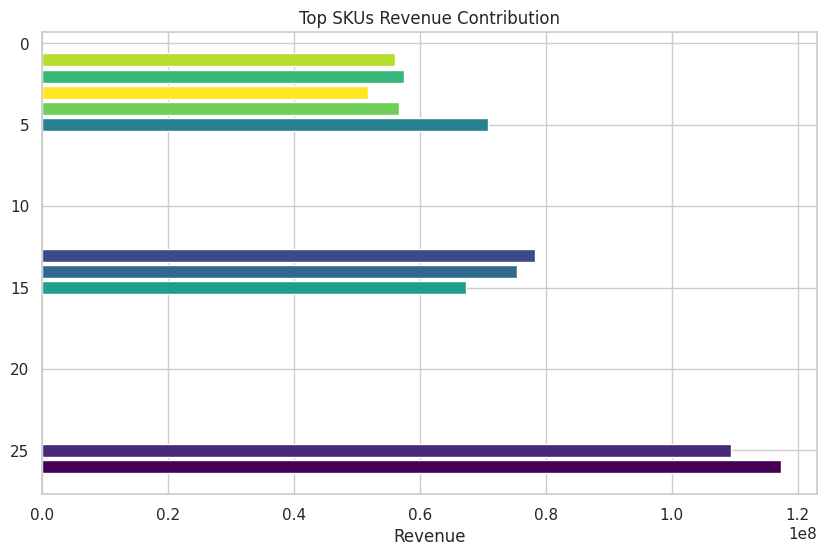

In [ ]:
# 4. Horizontal Bar Chart

import matplotlib.pyplot as plt
import numpy as np

# Create a color gradient with one unique color per bar
colors = plt.cm.viridis(np.linspace(0, 1, top_n))

plt.figure(figsize=(10, 6))
plt.barh(top_products['Product Description Index'], top_products['Line Total'], color=colors)
plt.xlabel('Revenue')
plt.title('Top SKUs Revenue Contribution')
plt.gca().invert_yaxis()
plt.show()


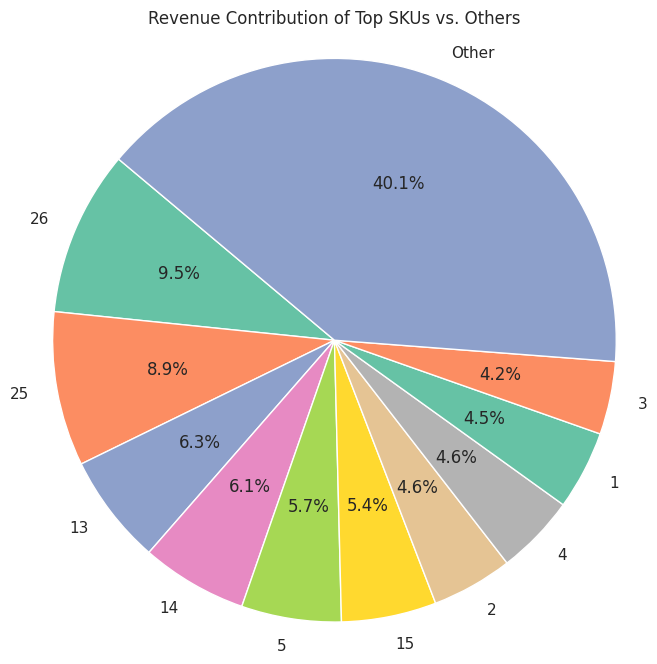

Number of SKUs in 'Other' category: 20


In [ ]:
# 5. Pie Chart: Revenue Contribution of Top SKUs vs. Others
other_revenue = total_revenue - top_products['Line Total'].sum()
labels = list(top_products['Product Description Index']) + ['Other']
sizes = list(top_products['Line Total']) + [other_revenue]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution of Top SKUs vs. Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Total number of unique SKUs
total_skus = grouped_data['Product Description Index'].nunique()

# Number of SKUs in the "Other" category
other_skus = total_skus - top_n
print(f"Number of SKUs in 'Other' category: {other_skus}")


**Insights:**

**1. Top 10 SKUs Drive Nearly Half of Total Revenue:**\
The top 10 products generate a substantial 60.9% of total revenue, amounting to \$763.6 million out of $1.253 billion, with the leading SKU (Product Description Index 26) contributing 9.5% and SKU 25 closely following at 8.9%.

**2. Strong Revenue Concentration at the Top**\
The top 10 SKUs each contribute between 4.2% and 9.5% of total revenue, revealing a sharp decline after the leading few. This concentration reflects a classic Pareto pattern, where a small group of products disproportionately drives overall sales.

**3. Long Tail of Low-Contributing SKUs**\
The remaining 20 SKUs account for just 39.1% of total revenue, with many contributing under 3% individually and some less than 2%. This long tail reflects a broad product mix with limited individual impact—valuable for niche or regional strategies, but less essential to driving core revenue.


### **5.4 Channel Profitability Ratio**




In [ ]:
import pandas as pd

# 1. Group the data by 'Channel' and aggregate total revenue and total cost
channel_analysis = sales_df.groupby('Channel').agg(
    total_revenue=('Line Total', 'sum'),  # Calculate the total revenue for each channel
    total_cost=('Total Unit Cost', 'sum')  # Calculate the total cost for each channel
).reset_index()  # Reset the index to convert the grouped data back into a DataFrame

# 2. Calculate profit for each channel by subtracting total cost from total revenue
channel_analysis['profit'] = channel_analysis['total_revenue'] - channel_analysis['total_cost']

# 3. Calculate the profitability ratio as a percentage. Profitability Ratio = (Profit / Revenue) * 100
channel_analysis['profitability_ratio'] = (channel_analysis['profit'] / channel_analysis['total_revenue']) * 100

# Print selected columns to display the results
print(channel_analysis[['Channel', 'total_revenue', 'total_cost', 'profit', 'profitability_ratio']])

       Channel  total_revenue    total_cost        profit  profitability_ratio
0  Distributor    387139788.6  2.886643e+07  3.582734e+08            92.543668
1       Export    180631866.0  1.328698e+07  1.673449e+08            92.644166
2    Wholesale    668197244.4  4.964890e+07  6.185483e+08            92.569724


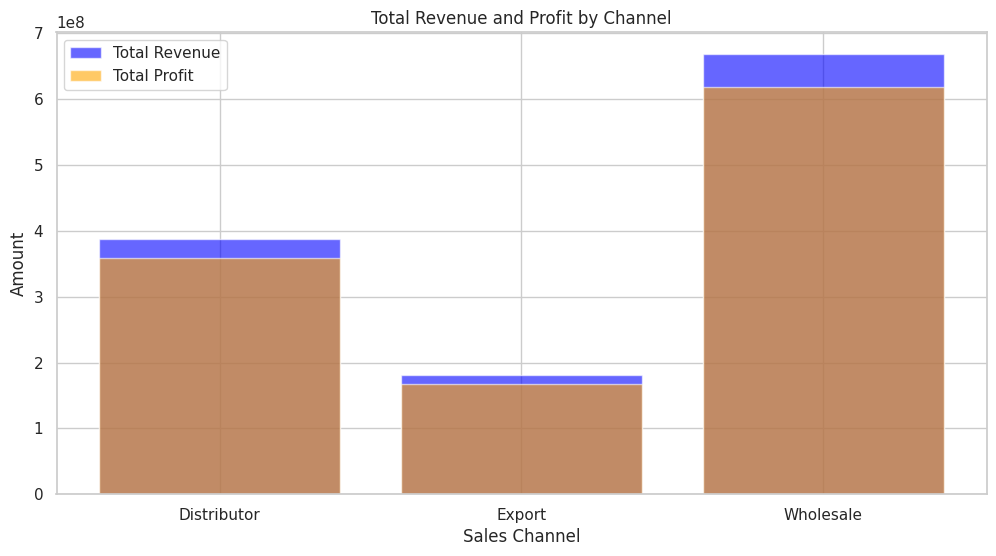

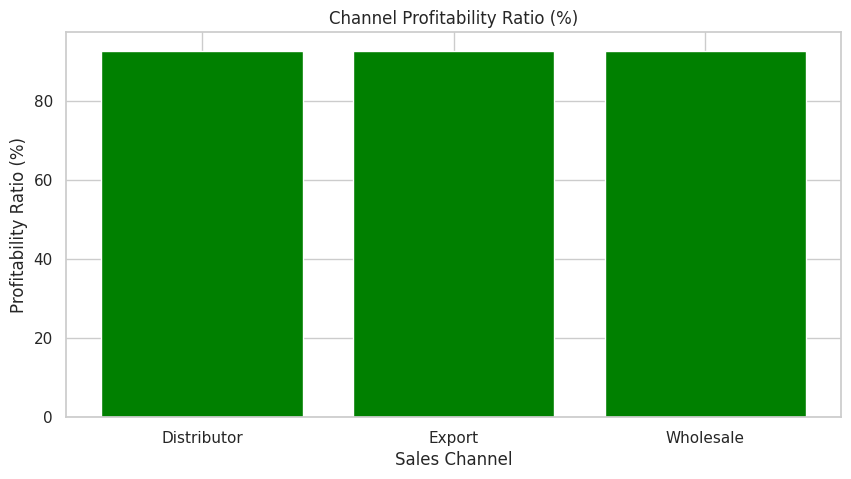

In [ ]:
import matplotlib.pyplot as plt

# 4. Bar chart for Total Revenue and Profit
plt.figure(figsize=(12, 6))
plt.bar(channel_analysis['Channel'], channel_analysis['total_revenue'], color='blue', alpha=0.6, label='Total Revenue')
plt.bar(channel_analysis['Channel'], channel_analysis['profit'], color='orange', alpha=0.6, label='Total Profit')
plt.title('Total Revenue and Profit by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')
plt.legend()
plt.show()

# 5. Bar chart for Profitability Ratio
plt.figure(figsize=(10, 5))
plt.bar(channel_analysis['Channel'], channel_analysis['profitability_ratio'], color='green')
plt.title('Channel Profitability Ratio (%)')
plt.xlabel('Sales Channel')
plt.ylabel('Profitability Ratio (%)')
plt.show()

**Insights:** Channel Profitability Ratio

**1. Profitability Ratio Comparison**\
The profitability ratio measures how much profit is retained per dollar of revenue. Here's how the channels stack up:

| Channel      | Profitability Ratio (%) |
|--------------|-------------------------|
| **Export**      | **92.64**                  |
| Wholesale     | 92.57                   |
| Distributor  | 92.54                   |

* **Export** is the most profitable channel, retaining the highest percentage of revenue as profit.
* **Wholesale** and **Distributor** follow closely, with marginal differences in profitability.

**2. Revenue vs. Profit Trade-off**
While Export leads in profitability ratio, it generates the **lowest total revenue** and **lowest absolute profit**:

| Channel      | Total Revenue | Profit  |
|--------------|---------------|---------|
| **Wholesale**    | **\$668.2M**      | **\$618.5M**  |
| Distributor  | \$387.1M       | \$358.3M  |
| Export       | \$180.6M       | $167.3M  |

**Strategic Implications**
* **Export** is highly efficient but small-scale. Consider scaling this channel if market conditions allow.

* **Wholesale** is the powerhouse—high volume and strong margins. It likely deserves continued or increased investment.

* **Distributor** is solid but slightly less efficient. Investigate cost structures or pricing strategies to improve margins.

---------------

## **6. Key Insights**

**1. Regional Revenue Growth Rate:**
* **The West region demonstrated both the highest growth rate and the strongest cumulative sales**, maintaining consistent revenue leadership from 2014 to 2017 and totaling approximately **$372 million** overall.
* **The Midwest region experienced the most severe decline**, with an **84%** drop in revenue in 2018 and the lowest growth rate across the full period, signaling significant performance deterioration.

**2. Seasonal Sales Variance:**
* **January and February saw peak monthly sales**, far surpassing the ~$103M average, pointing to a strong post-holiday surge likely driven by seasonal demand. In contrast, **April and June lagged behind**, hinting at slower consumer activity during those months.
* From 2014 to 2017, **Q4 consistently led in sales**, peaking at ~\$76.6M in 2015, underscoring strong year-end buying behavior. In contrast, **Q1 2018 plunged** to \$48.1M—far below the ~\$73M-\$74M norm—hinting at a broader business downturn or shifting seasonal dynamics.
* With a **coefficient of variation (CV) of ~8%**, monthly sales exhibit **low volatility**, indicating stable seasonal patterns that **support reliable forecasting and inventory planning**.

**3. Top SKUs Revenue Contribution:**
* **The top 10 SKUs generate 60.9% of total revenue**, totaling \$763.6 million out of $1.253 billion. With individual contributions ranging from 4.2% to 9.5%, this group shows a steep drop-off after the top few, highlighting a classic Pareto pattern where a small subset of products dominates overall sales.

* In contrast, **the remaining 20 SKUs contribute just 39.1% of revenue**, with many falling below 3% individually and some under 2%. This **long tail** represents a wide product mix with modest individual impact—useful for niche or regional strategies but less critical to core revenue performance.

**4. Channel Profitability Ratio:**
| Channel      | Profitability Ratio (%) | Total Revenue | Profit  |
|--------------|-------------------------|---------------|---------|
| **Export**      | **92.64**                  | \$180.6M      | \$167.3M  |
| **Wholesale**    | 92.57                   | **\$668.2M**      | **\$618.5M**  |
| Distributor  | 92.54                   | \$387.1M       | \$358.3M  |

All channels exhibit high profitability ratios above 92%, indicating strong cost efficiency. **Export** leads in margin (92.64%), making it the most profitable per dollar earned. However, **Wholesale** generates the highest revenue and profit in absolute terms, positioning it as the most financially impactful channel. **Distributor** performs solidly, with slightly lower margins and mid-tier revenue. Despite Export's efficiency, its lower scale limits its overall profit contribution.

**4.1 Strategic Implications**
* **Export** is highly efficient but small-scale. Consider scaling this channel if market conditions allow.

* **Wholesale** is the powerhouse—high volume and strong margins. It likely deserves continued or increased investment.

* **Distributor** is solid but slightly less efficient. Investigate cost structures or pricing strategies to improve margins.

---------------------

## **7. Recommendations**

**Seasonal & Regional Opportunities**
* **Boost Q1 & Q4:** Launch campaigns in January and Q4 to capitalize on peak sales. Prioritize top SKUs and Wholesale channel.
* **Target the West:** Focus investments and promotions in the West region, your strongest performer.
* **Forecast Confidently:** Use stable seasonal patterns (CV ~8%) to optimize inventory and staffing.

**Fix Underperformance**
Midwest Recovery: Investigate 2018’s drop. Test niche SKUs and alternative channels like Export.

**Spring Slumps (April/June):** Run clearance sales, seasonal events, or pilot new products.

**SKU Strategy:** Double down on top 10 SKUs. Use long-tail SKUs for regional or seasonal experiments.

**Channel Optimization:**
* **Scale Export:** High margin, low volume—expand if feasible.
* **Invest in Wholesale:** High revenue and profit—keep growing.
* **Improve Distributor Margins:** Audit costs and pricing.


